In [39]:
import numpy as np
import pandas as pd
from sklearn import mixture
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal


In [25]:
mean = np.array([[-1, 2], [2, 2], [-1, -2], [2, -2]]).reshape(4,2,1) # mean values
sigma = np.array([[0.2, 0, 0, 0.2], [1, -0.4, -0.4, 0.5], [1, 0, 0, 0.2], [0.2, 0, 0, 1]]).reshape(4,2,2) # Sigma true values
prior_prob = np.array([0.3, 0.2, 0.2, 0.3]) # alpha values

In [26]:
print(pd.DataFrame(np.reshape(sigma,(4,4))))

     0    1    2    3
0  0.2  0.0  0.0  0.2
1  1.0 -0.4 -0.4  0.5
2  1.0  0.0  0.0  0.2
3  0.2  0.0  0.0  1.0


In [34]:
N = 1000
n = 2
k =10

In [43]:
prob_temp = np.random.rand(1,N) # generating N random samples
cum_prior = np.cumsum(prior_prob) # cumulative sum
cum_prior = np.insert(cum_prior, 0, 0) # pl_mod is now [0 0.1 0.3 0.5 1] and we take ranges between them for the three classes

x = np.zeros([n,N])
ls = []
b = []

for i in range(mean.shape[0]):
    if (i != 3):
        number = np.where((prob_temp >= cum_prior[i]) & (prob_temp < cum_prior[i+1]))[1]
        x[:,number] = np.random.multivariate_normal(mean[i,:,:].reshape(2,), sigma[i,:,:], len(number)).T
    else:
        number = np.where((prob_temp >= cum_prior[i]) & (prob_temp <= cum_prior[i+1]))[1]
        x[:,number] = np.random.multivariate_normal(mean[i,:,:].reshape(2,), sigma[i,:,:], len(number)).T
    ls.append(number)
    #b = (multivariate_normal(x,mean=mean,cov=sigma))

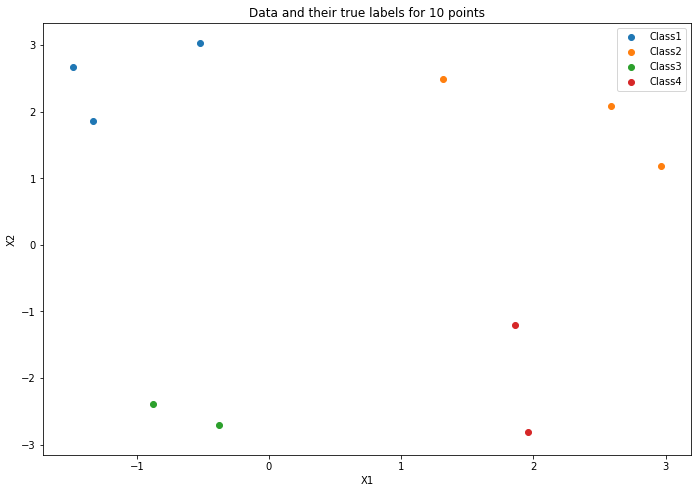

In [30]:
plt.figure()
plt.axes([1,1,1.5,1.5])
plt.scatter(x[0,ls[0]], x[1,ls[0]])
plt.scatter(x[0,ls[1]], x[1,ls[1]])
plt.scatter(x[0,ls[2]], x[1,ls[2]])
plt.scatter(x[0,ls[3]], x[1,ls[3]])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data and their true labels for {} points'.format(N))
plt.legend(('Class1', 'Class2', 'Class3', 'Class4'))
plt.show()

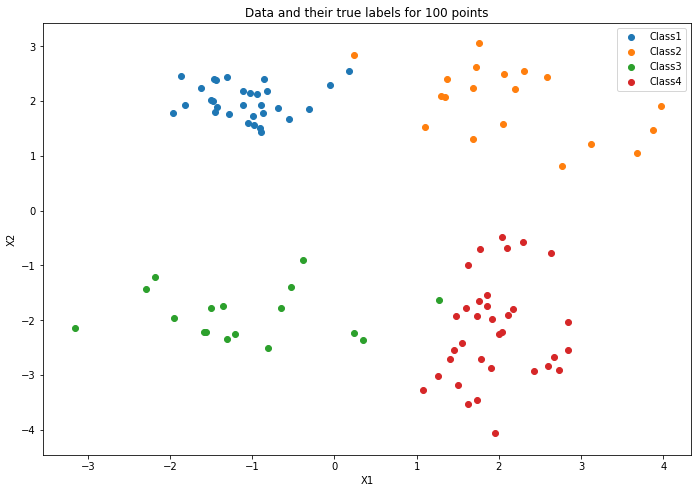

In [33]:
plt.figure()
plt.axes([1,1,1.5,1.5])
plt.scatter(x[0,ls[0]], x[1,ls[0]])
plt.scatter(x[0,ls[1]], x[1,ls[1]])
plt.scatter(x[0,ls[2]], x[1,ls[2]])
plt.scatter(x[0,ls[3]], x[1,ls[3]])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data and their true labels for {} points'.format(N))
plt.legend(('Class1', 'Class2', 'Class3', 'Class4'))
plt.show()

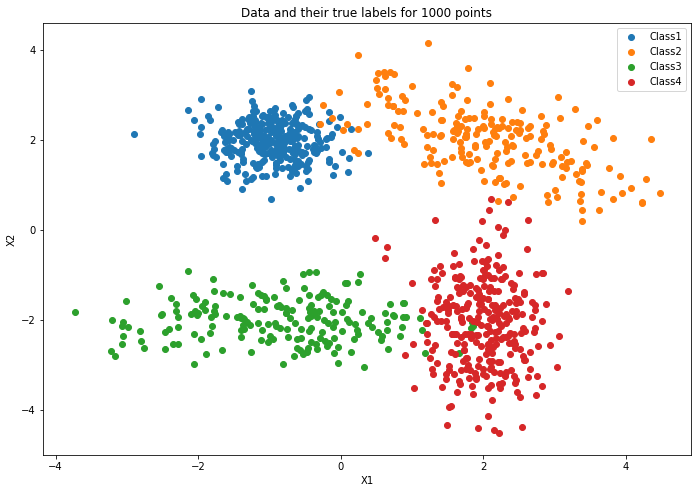

In [36]:
plt.figure()
plt.axes([1,1,1.5,1.5])
plt.scatter(x[0,ls[0]], x[1,ls[0]])
plt.scatter(x[0,ls[1]], x[1,ls[1]])
plt.scatter(x[0,ls[2]], x[1,ls[2]])
plt.scatter(x[0,ls[3]], x[1,ls[3]])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data and their true labels for {} points'.format(N))
plt.legend(('Class1', 'Class2', 'Class3', 'Class4'))
plt.show()

In [5]:
eva_for_each_boot = []
for num_of_comp in [1,2,3,4,5,6]: 
    mod_eva = []
    mod_test = []
    mod_mean = []
    mod_cov = []
    mod_alpha = []
    for fold in range(k):
        validate = x[:,fold*(N//k):(fold+1)*(N//k)]
        train_data = np.concatenate((x[:,:fold*(N//k)], x[:,(fold+1)*(N//k):]), axis = 1)
        gmm_est = mixture.GaussianMixture(n_components = num_of_comp) 
        gmm_est.fit(train_data.T) # Using train data to fit the model
        mod_eva.append(gmm_est.score(validate.T)) # Use evaluation data to validate the model
    
    eva_for_each_boot.append(np.mean(mod_eva))
        

In [6]:
eva_for_each_boot

[-4.258724407783449,
 -8.10345255912804,
 -12.677640467976694,
 -39.200996550417926,
 -281.8032550050094,
 -37145.55840631734]

In [7]:
idx = np.where((eva_for_each_boot==max(eva_for_each_boot)))
print(np.array(idx[0][0]))

0


In [8]:
N =10
performance = []
for i in range(100):
    prob_temp = np.random.rand(1,N) # generating N random samples
    cum_prior = np.cumsum(prior_prob) # cumulative sum
    cum_prior = np.insert(cum_prior, 0, 0) # pl_mod is now [0 0.1 0.3 0.5 1] and we take ranges between them for the three classes

    x = np.zeros([n,N])
    ls = []

    for i in range(mean.shape[0]):
        if (i != 3):
            number = np.where((prob_temp >= cum_prior[i]) & (prob_temp < cum_prior[i+1]))[1]
            x[:,number] = np.random.multivariate_normal(mean[i,:,:].reshape(2,), sigma[i,:,:], len(number)).T
        else:
            number = np.where((prob_temp >= cum_prior[i]) & (prob_temp <= cum_prior[i+1]))[1]
            x[:,number] = np.random.multivariate_normal(mean[i,:,:].reshape(2,), sigma[i,:,:], len(number)).T
        ls.append(number)
    
    eva_for_each_boot = []
    
    for num_of_comp in [1,2,3,4,5,6]: 
        eva_per_comp = []
        for fold in range(k):
            validate = x[:,fold*(N//k):(fold+1)*(N//k)]
            train_data = np.concatenate((x[:,:fold*(N//k)], x[:,(fold+1)*(N//k):]), axis = 1)
            gmm_est = mixture.GaussianMixture(n_components = num_of_comp) 
            gmm_est.fit(train_data.T) # Using train data to fit the model
            eva_per_comp.append(gmm_est.score(validate.T)) # Use evaluation data to validate the model

        eva_for_each_boot.append(np.average(eva_per_comp))
    idx = np.where((eva_for_each_boot==max(eva_for_each_boot)))
    performance.append(np.array(idx[0][0])+1)

performance_N_10 = performance

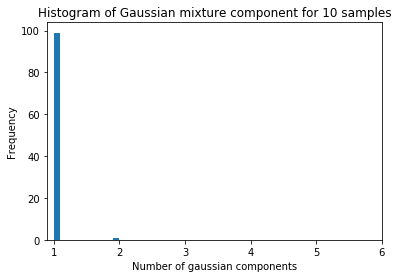

In [44]:

plt.hist(performance_N_10)
plt.xlim(0.9,6)
plt.xlabel('Number of gaussian components')
plt.ylabel('Frequency')
plt.title('Histogram of Gaussian mixture component for 10 samples')
plt.show()

In [12]:
N =100
performance = []
for i in range(100):
    prob_temp = np.random.rand(1,N) # generating N random samples
    cum_prior = np.cumsum(prior_prob) # cumulative sum
    cum_prior = np.insert(cum_prior, 0, 0) # pl_mod is now [0 0.1 0.3 0.5 1] and we take ranges between them for the three classes

    x = np.zeros([n,N])
    ls = []

    for i in range(mean.shape[0]):
        if (i != 3):
            number = np.where((prob_temp >= cum_prior[i]) & (prob_temp < cum_prior[i+1]))[1]
            x[:,number] = np.random.multivariate_normal(mean[i,:,:].reshape(2,), sigma[i,:,:], len(number)).T
        else:
            number = np.where((prob_temp >= cum_prior[i]) & (prob_temp <= cum_prior[i+1]))[1]
            x[:,number] = np.random.multivariate_normal(mean[i,:,:].reshape(2,), sigma[i,:,:], len(number)).T
        ls.append(number)
    
    eva_for_each_boot = []
    
    for num_of_comp in [1,2,3,4,5,6]: 
        eva_per_comp = []
        for fold in range(k):
            validate = x[:,fold*(N//k):(fold+1)*(N//k)]
            train_data = np.concatenate((x[:,:fold*(N//k)], x[:,(fold+1)*(N//k):]), axis = 1)
            gmm_est = mixture.GaussianMixture(n_components = num_of_comp) 
            gmm_est.fit(train_data.T) # Using train data to fit the model
            eva_per_comp.append(gmm_est.score(validate.T)) # Use evaluation data to validate the model

        eva_for_each_boot.append(np.average(eva_per_comp))
    idx = np.where((eva_for_each_boot==max(eva_for_each_boot)))
    performance.append(np.array(idx[0][0])+1)

performance_N_100 = performance

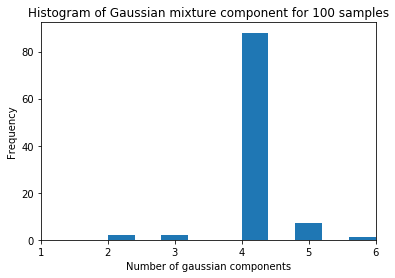

In [45]:

plt.hist(performance_N_100)
plt.xlim(1,6)
plt.xlabel('Number of gaussian components')
plt.ylabel('Frequency')
plt.title('Histogram of Gaussian mixture component for 100 samples')
plt.show()

In [14]:
N =1000
performance = []
for i in range(100):
    prob_temp = np.random.rand(1,N) # generating N random samples
    cum_prior = np.cumsum(prior_prob) # cumulative sum
    cum_prior = np.insert(cum_prior, 0, 0) # pl_mod is now [0 0.1 0.3 0.5 1] and we take ranges between them for the three classes

    x = np.zeros([n,N])
    ls = []

    for i in range(mean.shape[0]):
        if (i != 3):
            number = np.where((prob_temp >= cum_prior[i]) & (prob_temp < cum_prior[i+1]))[1]
            x[:,number] = np.random.multivariate_normal(mean[i,:,:].reshape(2,), sigma[i,:,:], len(number)).T
        else:
            number = np.where((prob_temp >= cum_prior[i]) & (prob_temp <= cum_prior[i+1]))[1]
            x[:,number] = np.random.multivariate_normal(mean[i,:,:].reshape(2,), sigma[i,:,:], len(number)).T
        ls.append(number)
    
    eva_for_each_boot = []
    
    for num_of_comp in [1,2,3,4,5,6]: 
        eva_per_comp = []
        for fold in range(k):
            validate = x[:,fold*(N//k):(fold+1)*(N//k)]
            train_data = np.concatenate((x[:,:fold*(N//k)], x[:,(fold+1)*(N//k):]), axis = 1)
            gmm_est = mixture.GaussianMixture(n_components = num_of_comp) 
            gmm_est.fit(train_data.T) # Using train data to fit the model
            eva_per_comp.append(gmm_est.score(validate.T)) # Use evaluation data to validate the model

        eva_for_each_boot.append(np.average(eva_per_comp))
    idx = np.where((eva_for_each_boot==max(eva_for_each_boot)))
    performance.append(np.array(idx[0][0])+1)

performance_N_1000 = performance

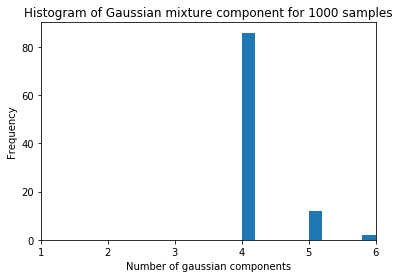

In [46]:

plt.hist(performance_N_1000)
plt.xlim(1,6)
plt.xlabel('Number of gaussian components')
plt.ylabel('Frequency')
plt.title('Histogram of Gaussian mixture component for 1000 samples')
plt.show()

## BOOTSTRAPPING

In [47]:
N =1000
performance = []
for i in range(100):
    prob_temp = np.random.rand(1,N) # generating N random samples
    cum_prior = np.cumsum(prior_prob) # cumulative sum
    cum_prior = np.insert(cum_prior, 0, 0) # pl_mod is now [0 0.1 0.3 0.5 1] and we take ranges between them for the three classes

    x = np.zeros([n,N])
    ls = []

    for i in range(mean.shape[0]):
        if (i != 3):
            number = np.where((prob_temp >= cum_prior[i]) & (prob_temp < cum_prior[i+1]))[1]
            x[:,number] = np.random.multivariate_normal(mean[i,:,:].reshape(2,), sigma[i,:,:], len(number)).T
        else:
            number = np.where((prob_temp >= cum_prior[i]) & (prob_temp <= cum_prior[i+1]))[1]
            x[:,number] = np.random.multivariate_normal(mean[i,:,:].reshape(2,), sigma[i,:,:], len(number)).T
        ls.append(number)
    
    eva_for_each_boot = []
    
    for num_of_comp in [1,2,3,4,5,6]: 
        eva_per_comp = []
        for fold in range(k):
            #idx = np.random.choice(int(0.2*x.shape[1]), 1000)
            idx = np.random.choice(x.shape[1], 1000)
            validate = x[:,idx]
            #validate = x[:,fold*(N//k):(fold+1)*(N//k)]
            #idx = np.random.choice(int(0.8*x.shape[1]), 1000)
            idx = np.random.choice(x.shape[1], 1000)
            #m = x[:,int(0.2*x.shape[1]):]
            train_data = x[:, idx]
            #train_data = np.concatenate((x[:,:fold*(N//k)], x[:,(fold+1)*(N//k):]), axis = 1)
            gmm_est = mixture.GaussianMixture(n_components = num_of_comp) 
            gmm_est.fit(train_data.T) # Using train data to fit the model
            eva_per_comp.append(gmm_est.score(validate.T)) # Use evaluation data to validate the model

        eva_for_each_boot.append(np.average(eva_per_comp))
    idx = np.where((eva_for_each_boot==max(eva_for_each_boot)))
    performance.append(np.array(idx[0][0])+1)

performance_N_1000_bootstrap = performance

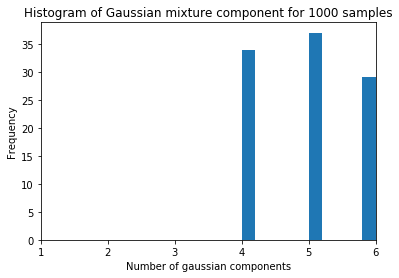

In [49]:

plt.hist(performance_N_1000_bootstrap)
plt.xlim(1,6)
plt.xlabel('Number of gaussian components')
plt.ylabel('Frequency')
plt.title('Histogram of Gaussian mixture component for 1000 samples')
plt.show()